## Process 4x4 lattice spin configurations into graphable data

In [58]:
FILENAME = "image4x4"
TEMP_VALS = [0.25, 4.75]
NUM_TEMPS = len(TEMP_VALS)
NUM_BINS = 10000
L = 4

import matplotlib.pyplot as plt
import numpy as np

file_string = "../spinConfigs_" + FILENAME + ".txt"

raw_spin_configs = []

spin_configs_file = open(file_string, "r")
for row in spin_configs_file:
    row = row.split()
    raw_spin_configs.append(row)

# initialize dictionary to store temperature data and corresponding spin configurations
data_dict = {}

# populate keys for dictionary from temperature values
for val in TEMP_VALS:
    data_dict[val] = []

# collect each set of 10000 spin configurations
for temp in range(NUM_TEMPS):
    for bin in range(NUM_BINS):
        data_dict[TEMP_VALS[temp]].append(raw_spin_configs[(temp * NUM_BINS) + bin])

    # convert all data to integers
    for entry in data_dict[TEMP_VALS[temp]]:
        for index in range(L*L):
            entry[index] = int(entry[index])
            if entry[index] == -1:
                entry[index] = 0

    # convert each entry to numpy array
    data_dict[TEMP_VALS[temp]] = np.array(data_dict[TEMP_VALS[temp]])

square_data_dict = {}

# reshape dictionary arrays into LxL instead of 
for temp in range(NUM_TEMPS):
    square_data_dict[TEMP_VALS[temp]] = data_dict[TEMP_VALS[temp]].reshape(NUM_BINS, L, L)

train_labels = np.ones(NUM_BINS)

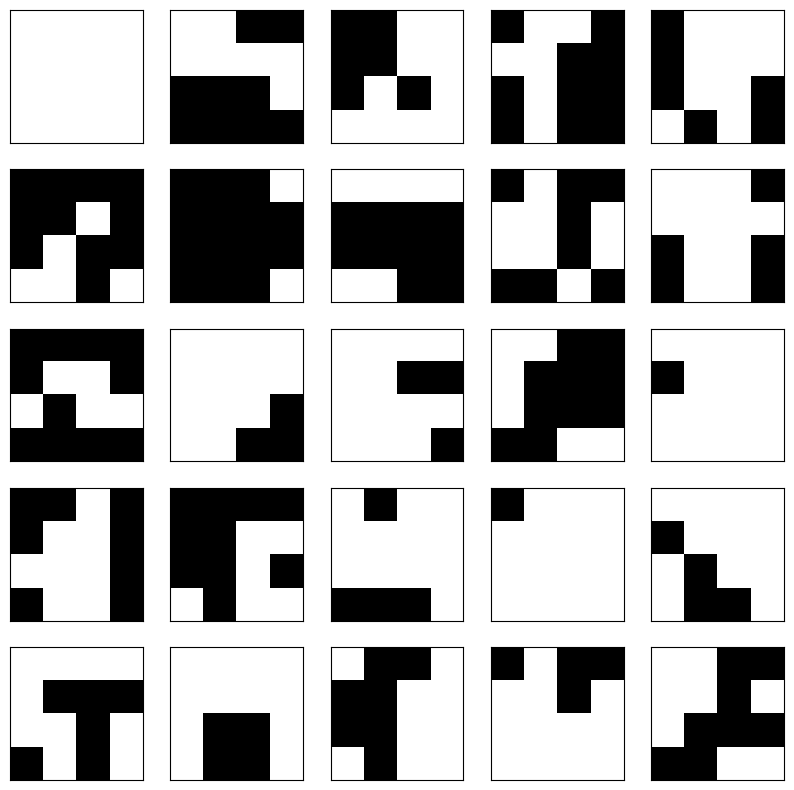

In [59]:
import tensorflow as tf

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(square_data_dict[4.75][i], cmap=plt.cm.binary)
plt.show()

## Do the same for 8x8!

In [65]:
FILENAME = "image8x8"
TEMP_VALS = [0.25, 4.75]
NUM_TEMPS = len(TEMP_VALS)
NUM_BINS = 10000
L = 8

import matplotlib.pyplot as plt
import numpy as np

file_string = "../spinConfigs_" + FILENAME + ".txt"

raw_spin_configs = []

spin_configs_file = open(file_string, "r")
for row in spin_configs_file:
    row = row.split()
    raw_spin_configs.append(row)

# initialize dictionary to store temperature data and corresponding spin configurations
data_dict = {}

# populate keys for dictionary from temperature values
for val in TEMP_VALS:
    data_dict[val] = []

# collect each set of 10000 spin configurations
for temp in range(NUM_TEMPS):
    for bin in range(NUM_BINS):
        data_dict[TEMP_VALS[temp]].append(raw_spin_configs[(temp * NUM_BINS) + bin])

    # convert all data to integers
    for entry in data_dict[TEMP_VALS[temp]]:
        for index in range(L*L):
            entry[index] = int(entry[index])
            if entry[index] == -1:
                entry[index] = 0

    # convert each entry to numpy array
    data_dict[TEMP_VALS[temp]] = np.array(data_dict[TEMP_VALS[temp]])

square_data_dict = {}

# reshape dictionary arrays into LxL instead of 
for temp in range(NUM_TEMPS):
    square_data_dict[TEMP_VALS[temp]] = data_dict[TEMP_VALS[temp]].reshape(NUM_BINS, L, L)

train_labels = np.ones(NUM_BINS)

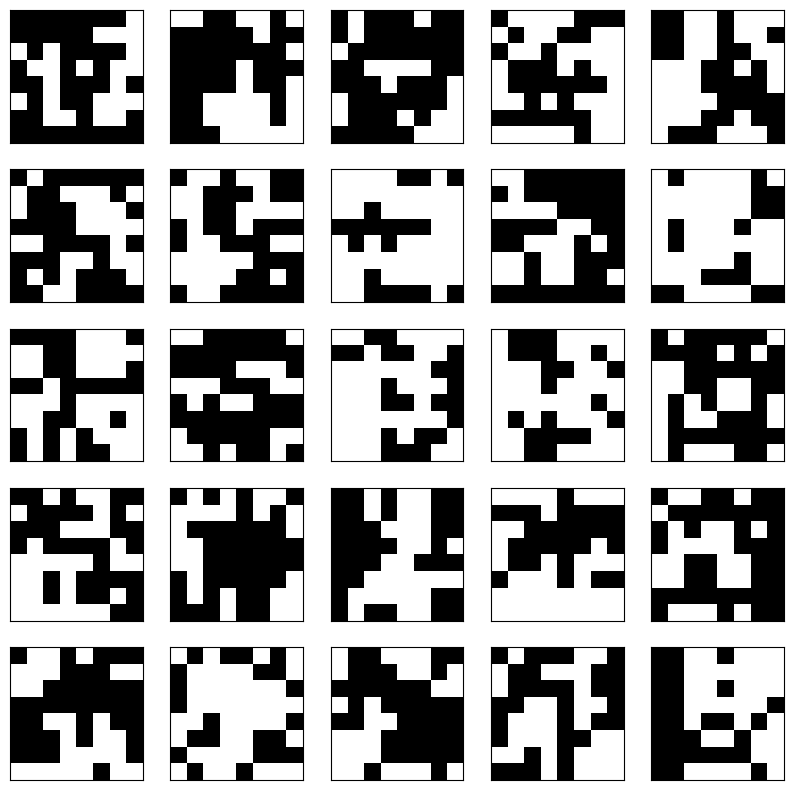

In [66]:
import tensorflow as tf

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(square_data_dict[4.75][i], cmap=plt.cm.binary)
plt.show()

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(L, L)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
model.fit(square_data_dict[4.75], train_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 3ms/step - loss: 0.1698 - accuracy: 0.9774
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 9.5930e-04 - accuracy: 1.0000
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 4.5954e-04 - accuracy: 1.0000
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 2.6445e-04 - accuracy: 1.0000
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 1.6881e-04 - accuracy: 1.0000
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 1.1490e-04 - accuracy: 1.0000
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 8.1806e-05 - accuracy: 1.0000
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 6.0253e-05 - accuracy: 1.0000
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - los

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3306 - accuracy: 0.8845 - 2s/epoch - 7ms/step

Test accuracy: 0.8845000267028809


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step
